In [ ]:
import pandas as pd
df = pd.read_csv('combined_file.csv')

# Show the first few rows of the dataset
print(df.head())

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Load and preprocess the dataset
df = pd.read_csv('combined_file.csv')

# Define feature columns and target column
X = df[['Melatonin', 'Delta', 'Theta', 'Alpha', 'Beta',
        'Physical Activity', 'Non-Physical Activity (Stress)', 'Sleep  Duration']]
y = df['Sleep Label']

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the model
model = Sequential()

# Build the model architecture
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer for multi-class classification

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)




<ipython-input-10-99e1549e32d3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11866/11866 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9853 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 1.7764e-05
Epoch 2/100
11866/11866 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 7.4816e-06
Epoch 3/100
11866/11866 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 1.2229e-06
Epoch 4/100
11866/11866 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.4417e-07
Epoch 5/100
11866/11866 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.9997 - loss: 9.4553e-04 - val_accuracy: 1.0000 - val_loss: 1.6915e-06
Epoch 6/100
11866/11866 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.9920e-07
Epoch 7/100
11866/11866 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9998 - loss: 6.9178e-04 - val_accuracy: 1.0000 - val_loss: 2.9266e-07
Epoch 8/100
11866/11866 ━━━━━━━━━━━━━━

In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# Detailed evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)


2543/2543 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 1.0000 - loss: 3.1269e-08
Test Loss: 3.0551717600246775e-08
Test Accuracy: 1.0
2543/2543 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step


Epoch 1/10
9493/9493 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9999 - loss: 4.5356e-04 - val_accuracy: 1.0000 - val_loss: 3.1872e-08
Epoch 2/10
9493/9493 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9999 - loss: 2.9050e-04 - val_accuracy: 1.0000 - val_loss: 2.0630e-08
Epoch 3/10
9493/9493 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9999 - loss: 3.9885e-04 - val_accuracy: 1.0000 - val_loss: 4.3876e-08
Epoch 4/10
9493/9493 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9999 - loss: 2.1269e-04 - val_accuracy: 1.0000 - val_loss: 1.4471e-08
Epoch 5/10
9493/9493 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9999 - loss: 5.6276e-04 - val_accuracy: 1.0000 - val_loss: 2.6144e-08
Epoch 6/10
9493/9493 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9999 - loss: 4.9367e-04 - val_accuracy: 1.0000 - val_loss: 1.7577e-06
Epoch 7/10
9493/9493 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9999 - loss: 5.9555e-04 - val_accuracy: 1.0000 - val_loss: 1.2899e-08
Epoch 8/10
9493/9493 ━━━━━━

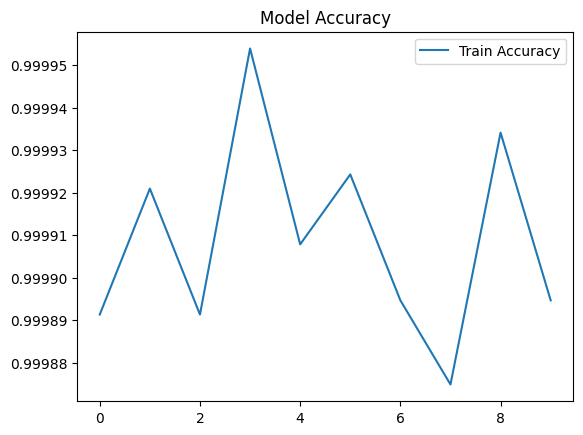

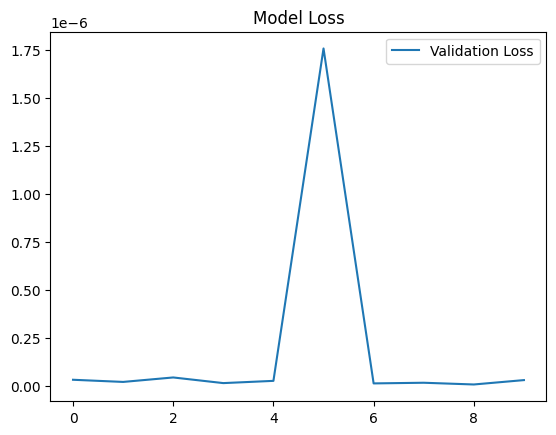

In [ ]:
import matplotlib.pyplot as plt

# Plot training  accuracy values
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


# Plot validation loss value
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

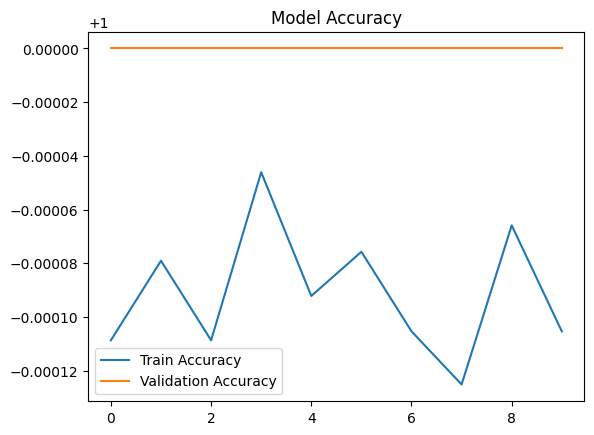

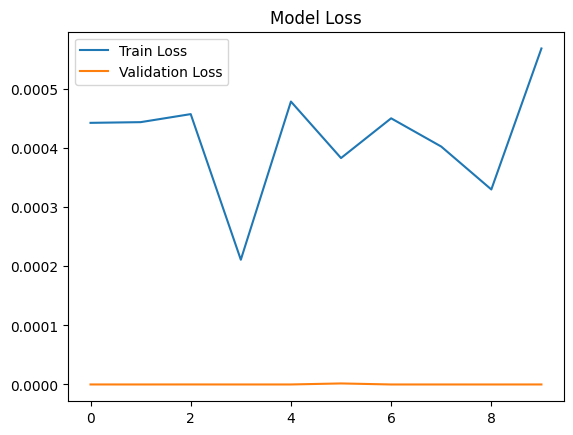

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Sleep Label' column to string type before plotting
df['Sleep Label'] = df['Sleep Label'].astype(str)

sizes = np.random.randint(10, 100, len(df))  # Generate random sizes between 10 and 100

plt.scatter(df['Melatonin'], df['Sleep Label'], s=sizes, alpha=0.5, c='blue', edgecolors='w')
plt.title("Bubble Chart")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()